<a href="https://colab.research.google.com/github/jtndr26/Global-Terrorism-Data/blob/main/EDA_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA_Global Terrorism

## Problem Statement:
- Explore and Analyze the data to discover key findings pertaining to terrorist activities at global level.

## Objective:
- To findout the stats and impact of the terrorists activities that occured across the global in the past few decades.
- Visualize the data to get a better details about the dataset. 

In [1]:
# Mounting drive to read file from Google drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing Numpy and Pandas library
import numpy as np
import pandas as pd

pd.set_option('display.max_columns',None)


## Importing Data and observing different features in the dataset.

In [5]:
# Importing Data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA/EDA_Capstone_Project/Global Terrorism Data.csv',encoding = 'ISO-8859-1')
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [6]:
df.shape

(181691, 135)

**Dataset consists of almost 181K entries with 135 features**
. 

In [7]:
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             181691 non-null  int64  
 1    iyear               181691 non-null  int64  
 2    imonth              181691 non-null  int64  
 3    iday                181691 non-null  int64  
 4    approxdate          9239 non-null    object 
 5    extended            181691 non-null  int64  
 6    resolution          2220 non-null    object 
 7    country             181691 non-null  int64  
 8    country_txt         181691 non-null  object 
 9    region              181691 non-null  int64  
 10   region_txt          181691 non-null  object 
 11   provstate           181270 non-null  object 
 12   city                181257 non-null  object 
 13   latitude            177135 non-null  float64
 14   longitude           177134 non-null  float64
 15   specificity    

In [8]:
(df.isnull().sum()/len(df) *100).sort_values(ascending = False)[0:51]

gsubname3           99.988992
weapsubtype4_txt    99.961473
weapsubtype4        99.961473
weaptype4           99.959822
weaptype4_txt       99.959822
claimmode3          99.926799
claimmode3_txt      99.926799
gsubname2           99.911938
claim3              99.824978
guncertain3         99.823877
gname3              99.821675
divert              99.821675
attacktype3         99.764435
attacktype3_txt     99.764435
ransomnote          99.717102
ransompaidus        99.696187
ransomamtus         99.690133
claimmode2          99.660963
claimmode2_txt      99.660963
ransompaid          99.574002
corp3               99.435305
targsubtype3        99.396228
targsubtype3_txt    99.396228
natlty3_txt         99.368708
natlty3             99.368708
target3             99.353298
targtype3           99.352747
targtype3_txt       99.352747
ransomamt           99.256980
weapsubtype3_txt    99.068198
weapsubtype3        99.068198
weaptype3_txt       98.974633
weaptype3           98.974633
claim2    

Bulk of the data have considerable percentage of null entries.

In [9]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [10]:
df.location.tail(10)

181681    The incident occurred in the Poblacion Mother ...
181682    The incident occurred in the Ascoli Piceno dis...
181683                                                  NaN
181684    The incident occurred in the Dima Hasao distri...
181685                                                  NaN
181686       The incident occurred near the town of Balcad.
181687       The incident occurred at the Humaymim Airport.
181688    The incident occurred in the Datu Hoffer distr...
181689    The incident occurred in the Mantripukhri neig...
181690                                                  NaN
Name: location, dtype: object

In [11]:
df[['latitude','longitude']].head()

,latitude,longitude
0,18.456792,-69.951164
1,19.371887,-99.086624
2,15.478598,120.599741
3,37.997490,23.762728
4,33.580412,130.396361


In [12]:
df.loc[100:115,'motive']

100                                                  NaN
101                                                  NaN
102    To protest Frank Schaeffer's defense of the Cl...
103                                                  NaN
104                                                  NaN
105                                                  NaN
106    Sabotage the US Army war efforts and protest t...
107                                                  NaN
108                                                  NaN
109                                                  NaN
110                                                  NaN
111    To protest United States presence in Puerto Ri...
112                                                  NaN
113                                       To kill police
114                                       To kill police
115                                                  NaN
Name: motive, dtype: object

## Cleaning the dataset, to make it readable for further analysis.

**Dropping Columns with more than 50% null values**, since it is not possible for us to impute this percentage of missing data.


In [13]:
drop_cols1 = [i for i in df.columns if df[i].isnull().sum()/len(df[i])*100>50]
len(drop_cols1)
df.drop(drop_cols1,axis = 1,inplace = True)

In [14]:
drop_cols1

['approxdate',
 'resolution',
 'location',
 'alternative',
 'alternative_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain2',
 'guncertain3',
 'claimmode',
 'claimmode_txt',
 'claim2',
 'claimmode2',
 'claimmode2_txt',
 'claim3',
 'claimmode3',
 'claimmode3_txt',
 'compclaim',
 'weaptype2',
 'weaptype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype3',
 'weaptype3_txt',
 'weapsubtype3',
 'weapsubtype3_txt',
 'weaptype4',
 'weaptype4_txt',
 'weapsubtype4',
 'weapsubtype4_txt',
 'propextent',
 'propextent_txt',
 'propvalue',
 'propcomment',
 'nhostkid',
 'nhostkidus',
 'nhours',
 'ndays',
 'divert',
 'kidhijcountry',
 'ransom',
 'ra

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 58 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  summary           115562 non-null  object 
 16  crit1             18

In [16]:
df.shape

(181691, 58)

After dropping columns with 50% or more null count the feature size have reduced from 135 to 58. 

In [17]:
(df.isnull().sum()/len(df)*100).sort_values(ascending = False)[:20]

nperps              39.140629
nperpcap            38.245703
nwoundte            38.055270
weapdetail          37.244553
nkillter            36.852678
scite1              36.430533
summary             36.396409
claimed             36.391456
nwoundus            35.611010
nkillus             35.470111
corp1               23.418882
weapsubtype1_txt    11.430396
weapsubtype1        11.430396
nwound               8.977330
targsubtype1         5.709144
targsubtype1_txt     5.709144
nkill                5.676120
longitude            2.508104
latitude             2.507554
natlty1_txt          0.858050
dtype: float64

In [18]:
df[~df['summary'].isnull()].head(3)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
5,197001010002,1970,1,1,0,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,1/1/1970: Unknown African American assailants ...,1,1,1,0.0,0.0,1,0,2,Armed Assault,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,217.0,United States,Black Nationalists,0.0,0,-99.0,-99.0,0.0,5,Firearms,5.0,Unknown Gun Type,Several gunshots were fired.,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,"""Police Chief Quits,"" Washington Post, January...",Hewitt Project,-9,-9,0,-9
7,197001020002,1970,1,2,0,217,United States,1,North America,California,Oakland,37.791927,-122.225906,1.0,0,1/2/1970: Unknown perpetrators detonated explo...,1,1,1,1.0,0.0,1,0,3,Bombing/Explosion,21,Utilities,107.0,Electricity,Pacific Gas & Electric Company,Edes Substation,217.0,United States,Unknown,0.0,0,-99.0,-99.0,0.0,6,Explosives,16.0,Unknown Explosive Type,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,Committee on Government Operations United Stat...,Hewitt Project,-9,-9,0,-9
8,197001020003,1970,1,2,0,217,United States,1,North America,Wisconsin,Madison,43.076592,-89.412488,1.0,0,"1/2/1970: Karl Armstrong, a member of the New ...",1,1,1,0.0,0.0,1,0,7,Facility/Infrastructure Attack,4,Military,28.0,Military Recruiting Station/Academy,R.O.T.C.,"R.O.T.C. offices at University of Wisconsin, M...",217.0,United States,New Year's Gang,0.0,0,1.0,1.0,1.0,8,Incendiary,19.0,Molotov Cocktail/Petrol Bomb,Firebomb consisting of gasoline,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,"Tom Bates, ""Rads: The 1970 Bombing of the Army...",Hewitt Project,0,0,0,0


In [19]:
df[['provstate','city']].head()

,provstate,city
0,NaN,Santo Domingo
1,Federal,Mexico city
2,Tarlac,Unknown
3,Attica,Athens
4,Fukouka,Fukouka


In [20]:
df[df['city'].isna()]['provstate'].head()

79458         Narathiwat
79459            Pattani
79550            Pattani
79583               Yala
79952    Yala (Province)
Name: provstate, dtype: object

In [21]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

### Dropping columns which are not relevant to our analysis.

In [22]:
drop_cols2 = ['eventid','country','region','city', 'latitude','longitude','specificity','vicinity','summary','attacktype1','targtype1', 'targtype1_txt',
       'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1','guncertain1','weaptype1','weapsubtype1','weapsubtype1_txt', 'weapdetail','property',
        'scite1', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']

We find the above mentioned columns irrelevant as their data is found to be explained with some other variable, thus dropping them is not only will be helpful but will also reduce the computation time.

In [23]:
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,NaN,NaN,13,Unknown,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,8,Incendiary,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


In [24]:
# Dropping columns which are included in list drop_cols2
df.drop(drop_cols2, axis = 1,inplace = True)
df.shape

(181691, 29)

In [25]:
df.head()

,iyear,imonth,iday,extended,country_txt,region_txt,provstate,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1_txt,natlty1_txt,gname,individual,nperps,nperpcap,claimed,weaptype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,ishostkid
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,NaN,1,1,1,0.0,0.0,1,0,Assassination,Dominican Republic,MANO-D,0,NaN,NaN,NaN,Unknown,1.0,NaN,NaN,0.0,NaN,NaN,0.0
1,1970,0,0,0,Mexico,North America,Federal,1,1,1,0.0,0.0,1,0,Hostage Taking (Kidnapping),Belgium,23rd of September Communist League,0,7.0,NaN,NaN,Unknown,0.0,NaN,NaN,0.0,NaN,NaN,1.0
2,1970,1,0,0,Philippines,Southeast Asia,Tarlac,1,1,1,0.0,0.0,1,0,Assassination,United States,Unknown,0,NaN,NaN,NaN,Unknown,1.0,NaN,NaN,0.0,NaN,NaN,0.0
3,1970,1,0,0,Greece,Western Europe,Attica,1,1,1,0.0,0.0,1,0,Bombing/Explosion,United States,Unknown,0,NaN,NaN,NaN,Explosives,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,1970,1,0,0,Japan,East Asia,Fukouka,1,1,1,-9.0,0.0,1,0,Facility/Infrastructure Attack,United States,Unknown,0,NaN,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [26]:
df.isnull().sum()/len(df)*100

iyear               0.000000
imonth              0.000000
iday                0.000000
extended            0.000000
country_txt         0.000000
region_txt          0.000000
provstate           0.231712
crit1               0.000000
crit2               0.000000
crit3               0.000000
doubtterr           0.000550
multiple            0.000550
success             0.000000
suicide             0.000000
attacktype1_txt     0.000000
natlty1_txt         0.858050
gname               0.000000
individual          0.000000
nperps             39.140629
nperpcap           38.245703
claimed            36.391456
weaptype1_txt       0.000000
nkill               5.676120
nkillus            35.470111
nkillter           36.852678
nwound              8.977330
nwoundus           35.611010
nwoundte           38.055270
ishostkid           0.097969
dtype: float64

In [27]:
df.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country_txt', 'region_txt',
       'provstate', 'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple',
       'success', 'suicide', 'attacktype1_txt', 'natlty1_txt', 'gname',
       'individual', 'nperps', 'nperpcap', 'claimed', 'weaptype1_txt', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'ishostkid'],
      dtype='object')

**Imputing data for the missing value seems illogocal here as the recorded data is for terror attacks and using any method like mean or mode may not appropriately suit our requirement.** 

In [28]:
# Dropping all null values
df = df.dropna()
df.shape

(92153, 29)

In [29]:
df.isnull().sum()/len(df)*100

iyear              0.0
imonth             0.0
iday               0.0
extended           0.0
country_txt        0.0
region_txt         0.0
provstate          0.0
crit1              0.0
crit2              0.0
crit3              0.0
doubtterr          0.0
multiple           0.0
success            0.0
suicide            0.0
attacktype1_txt    0.0
natlty1_txt        0.0
gname              0.0
individual         0.0
nperps             0.0
nperpcap           0.0
claimed            0.0
weaptype1_txt      0.0
nkill              0.0
nkillus            0.0
nkillter           0.0
nwound             0.0
nwoundus           0.0
nwoundte           0.0
ishostkid          0.0
dtype: float64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92153 entries, 5 to 181690
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   iyear            92153 non-null  int64  
 1   imonth           92153 non-null  int64  
 2   iday             92153 non-null  int64  
 3   extended         92153 non-null  int64  
 4   country_txt      92153 non-null  object 
 5   region_txt       92153 non-null  object 
 6   provstate        92153 non-null  object 
 7   crit1            92153 non-null  int64  
 8   crit2            92153 non-null  int64  
 9   crit3            92153 non-null  int64  
 10  doubtterr        92153 non-null  float64
 11  multiple         92153 non-null  float64
 12  success          92153 non-null  int64  
 13  suicide          92153 non-null  int64  
 14  attacktype1_txt  92153 non-null  object 
 15  natlty1_txt      92153 non-null  object 
 16  gname            92153 non-null  object 
 17  individual 

In [31]:
df.head()

,iyear,imonth,iday,extended,country_txt,region_txt,provstate,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1_txt,natlty1_txt,gname,individual,nperps,nperpcap,claimed,weaptype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,ishostkid
5,1970,1,1,0,United States,North America,Illinois,1,1,1,0.0,0.0,1,0,Armed Assault,United States,Black Nationalists,0,-99.0,-99.0,0.0,Firearms,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1970,1,2,0,United States,North America,California,1,1,1,1.0,0.0,1,0,Bombing/Explosion,United States,Unknown,0,-99.0,-99.0,0.0,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1970,1,2,0,United States,North America,Wisconsin,1,1,1,0.0,0.0,1,0,Facility/Infrastructure Attack,United States,New Year's Gang,0,1.0,1.0,1.0,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1970,1,3,0,United States,North America,Wisconsin,1,1,1,0.0,0.0,1,0,Facility/Infrastructure Attack,United States,New Year's Gang,0,1.0,1.0,0.0,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,1970,1,6,0,United States,North America,Colorado,1,1,1,1.0,0.0,1,0,Facility/Infrastructure Attack,United States,Left-Wing Militants,0,-99.0,-99.0,0.0,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df[df.iday == 0]

,iyear,imonth,iday,extended,country_txt,region_txt,provstate,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1_txt,natlty1_txt,gname,individual,nperps,nperpcap,claimed,weaptype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,ishostkid
244,1970,5,0,0,United States,North America,Massachusetts,1,1,1,1.0,0.0,1,0,Facility/Infrastructure Attack,United States,Black Nationalists,0,-99.0,-99.0,0.0,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245,1970,5,0,0,United States,North America,Puerto Rico,1,1,1,1.0,0.0,1,0,Bombing/Explosion,United States,Puerto Rican Nationalists,0,-99.0,-99.0,0.0,Explosives,0.0,0.0,0.0,1.0,1.0,0.0,0.0
377,1970,7,0,0,United States,North America,Wisconsin,1,1,1,0.0,0.0,0,0,Bombing/Explosion,United States,Left-Wing Militants,0,-99.0,-99.0,0.0,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0.0
378,1970,7,0,0,United States,North America,Massachusetts,1,1,1,1.0,0.0,1,0,Facility/Infrastructure Attack,United States,Black Nationalists,0,-99.0,-99.0,0.0,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5501,1977,11,0,0,United States,North America,Ohio,1,1,1,0.0,0.0,1,0,Facility/Infrastructure Attack,United States,Anti-Abortion extremists,0,-99.0,-99.0,0.0,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104603,2011,12,0,0,West Bank and Gaza Strip,Middle East & North Africa,West Bank,1,1,1,0.0,0.0,1,0,Unarmed Assault,West Bank and Gaza Strip,Jewish Extremists,0,-99.0,0.0,0.0,Other,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104611,2011,12,0,0,Pakistan,South Asia,Khyber Pakhtunkhwa,1,1,1,0.0,1.0,1,0,Bombing/Explosion,Pakistan,Unknown,0,-99.0,0.0,0.0,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104612,2011,12,0,0,Pakistan,South Asia,Khyber Pakhtunkhwa,1,1,1,0.0,1.0,1,0,Bombing/Explosion,Pakistan,Unknown,0,-99.0,0.0,0.0,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104613,2011,12,0,0,Pakistan,South Asia,Khyber Pakhtunkhwa,1,1,1,0.0,1.0,1,0,Bombing/Explosion,Pakistan,Unknown,0,-99.0,0.0,0.0,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**The column iday which store the date for the attack happened has few entries which read as '0', which are abnormal. So we convert those day to 1's.**

In [33]:
df.loc[df['iday'] == 0,'iday'] = 1
df.loc[244:250,]

,iyear,imonth,iday,extended,country_txt,region_txt,provstate,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1_txt,natlty1_txt,gname,individual,nperps,nperpcap,claimed,weaptype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,ishostkid
244,1970,5,1,0,United States,North America,Massachusetts,1,1,1,1.0,0.0,1,0,Facility/Infrastructure Attack,United States,Black Nationalists,0,-99.0,-99.0,0.0,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245,1970,5,1,0,United States,North America,Puerto Rico,1,1,1,1.0,0.0,1,0,Bombing/Explosion,United States,Puerto Rican Nationalists,0,-99.0,-99.0,0.0,Explosives,0.0,0.0,0.0,1.0,1.0,0.0,0.0
246,1970,5,1,0,United States,North America,New York,1,1,1,0.0,0.0,1,0,Facility/Infrastructure Attack,United States,Left-Wing Militants,0,4.0,-99.0,0.0,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247,1970,5,1,0,United States,North America,Indiana,1,1,1,0.0,0.0,1,0,Bombing/Explosion,United States,Student Radicals,0,-99.0,-99.0,0.0,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248,1970,5,1,0,United States,North America,Connecticut,1,1,1,0.0,0.0,1,0,Bombing/Explosion,United States,Student Radicals,0,-99.0,-99.0,0.0,Explosives,0.0,0.0,0.0,2.0,2.0,0.0,0.0
249,1970,5,1,0,United States,North America,New York,1,1,1,0.0,1.0,1,0,Bombing/Explosion,United States,Armed Revolutionary Independence Movement (MIRA),0,-99.0,-99.0,0.0,Explosives,0.0,0.0,0.0,10.0,10.0,0.0,0.0
250,1970,5,1,0,United States,North America,New York,1,1,1,0.0,1.0,1,0,Bombing/Explosion,United States,Armed Revolutionary Independence Movement (MIRA),0,-99.0,-99.0,0.0,Explosives,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [34]:
cols = ['iyear','imonth','iday']

**Creating Datetime datatype from the available time series data.**

In [35]:
df['Date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)),axis = 'columns')
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92153 entries, 5 to 181690
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   iyear            92153 non-null  int64         
 1   imonth           92153 non-null  int64         
 2   iday             92153 non-null  int64         
 3   extended         92153 non-null  int64         
 4   country_txt      92153 non-null  object        
 5   region_txt       92153 non-null  object        
 6   provstate        92153 non-null  object        
 7   crit1            92153 non-null  int64         
 8   crit2            92153 non-null  int64         
 9   crit3            92153 non-null  int64         
 10  doubtterr        92153 non-null  float64       
 11  multiple         92153 non-null  float64       
 12  success          92153 non-null  int64         
 13  suicide          92153 non-null  int64         
 14  attacktype1_txt  92153 non-null  obje

In [36]:
df.drop(cols,axis = 1,inplace = True)

In [37]:
cols = df.columns.tolist()
cols = cols[-1:]+cols[:-1]
df =df[cols]
df.head()

,Date,extended,country_txt,region_txt,provstate,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1_txt,natlty1_txt,gname,individual,nperps,nperpcap,claimed,weaptype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,ishostkid
5,1970-01-01,0,United States,North America,Illinois,1,1,1,0.0,0.0,1,0,Armed Assault,United States,Black Nationalists,0,-99.0,-99.0,0.0,Firearms,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1970-01-02,0,United States,North America,California,1,1,1,1.0,0.0,1,0,Bombing/Explosion,United States,Unknown,0,-99.0,-99.0,0.0,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1970-01-02,0,United States,North America,Wisconsin,1,1,1,0.0,0.0,1,0,Facility/Infrastructure Attack,United States,New Year's Gang,0,1.0,1.0,1.0,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1970-01-03,0,United States,North America,Wisconsin,1,1,1,0.0,0.0,1,0,Facility/Infrastructure Attack,United States,New Year's Gang,0,1.0,1.0,0.0,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,1970-01-06,0,United States,North America,Colorado,1,1,1,1.0,0.0,1,0,Facility/Infrastructure Attack,United States,Left-Wing Militants,0,-99.0,-99.0,0.0,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df.shape

(92153, 27)

**Renaming columns for our convenience**

In [39]:
df.rename(columns = {'country_txt':'country','region_txt':'region','provstate':'state','gname':'Terror_org','attacktype1_txt':'attack','natlty1_txt':'nationality','weaptype1_txt':'weapon'},inplace = True)

After a thorough cleanup and few manipulation work we have a dataset with around 92K entries and described by 27 features.

**Extracting columns with integer datatype and object datatypes seperately.**

In [40]:
num_cols = df.select_dtypes(include = ['int64','float64']).columns
cat_cols = df.select_dtypes(include = ['object']).columns
print(num_cols)
print(cat_cols)

Index(['extended', 'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple',
       'success', 'suicide', 'individual', 'nperps', 'nperpcap', 'claimed',
       'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte',
       'ishostkid'],
      dtype='object')
Index(['country', 'region', 'state', 'attack', 'nationality', 'Terror_org',
       'weapon'],
      dtype='object')


In [41]:
for i in cat_cols:
  print((df[i].value_counts(normalize = True)*100)[:5])
  print('\n')

Iraq           22.201122
Pakistan       12.517227
Afghanistan    10.847178
India           8.144065
Philippines     4.743199
Name: country, dtype: float64


Middle East & North Africa    37.051425
South Asia                    34.188795
Sub-Saharan Africa             9.829306
Southeast Asia                 8.712684
Eastern Europe                 3.347694
Name: region, dtype: float64


Baghdad               6.708409
Balochistan           3.609215
Khyber Pakhtunkhwa    3.256541
Saladin               3.225071
Al Anbar              3.120897
Name: state, dtype: float64


Bombing/Explosion                 54.042733
Armed Assault                     23.132182
Assassination                      6.837542
Facility/Infrastructure Attack     5.841373
Hostage Taking (Kidnapping)        5.260816
Name: attack, dtype: float64


Iraq           22.000369
Pakistan       12.225321
Afghanistan     9.986653
India           8.186386
Philippines     4.672664
Name: nationality, dtype: float64


Unknown        

In [42]:
for i in cat_cols:
  print((df[i].value_counts(normalize = True)*100).sort_values()[:5])
  print('\n')

Malawi                            0.001085
Slovak Republic                   0.001085
Bahamas                           0.001085
Djibouti                          0.001085
People's Republic of the Congo    0.001085
Name: country, dtype: float64


Central America & Caribbean    0.069450
Australasia & Oceania          0.080301
East Asia                      0.168199
Central Asia                   0.197498
North America                  1.779649
Name: region, dtype: float64


Vidzeme                            0.001085
Zaqatala                           0.001085
Sa Kaeo                            0.001085
Samegrelo-Zemo Svaneti (Region)    0.001085
Northern Ostrobothnia              0.001085
Name: state, dtype: float64


Hijacking                              0.283225
Hostage Taking (Barricade Incident)    0.361356
Unarmed Assault                        0.533895
Unknown                                3.706879
Hostage Taking (Kidnapping)            5.260816
Name: attack, dtype: float64


B

**The above stats for the attacks and other information can be understood better with the help of visualization.**

In [43]:
df[num_cols].describe()

,extended,crit1,crit2,crit3,doubtterr,multiple,success,suicide,individual,nperps,nperpcap,claimed,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,ishostkid
count,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000
mean,0.038338,0.988172,0.995475,0.877595,0.152844,0.151997,0.860797,0.058880,0.004666,-77.534394,-1.463197,0.143772,1.912417,0.010233,0.353195,3.203694,0.016353,0.119019,0.047150
std,0.192013,0.108113,0.067117,0.327755,0.359839,0.359020,0.346160,0.235402,0.068150,50.417632,12.467738,0.568608,6.902768,0.272828,2.234801,12.846896,0.710508,1.485200,0.431904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-99.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-99.000000,0.000000,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3200.000000,200.000000,1.000000,670.000000,44.000000,151.000000,1500.000000,151.000000,150.000000,1.000000


# Data Visualisation.

### Univariate Analysis

In [44]:
# Importing libraries for data visualisation.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Analysing categorical data

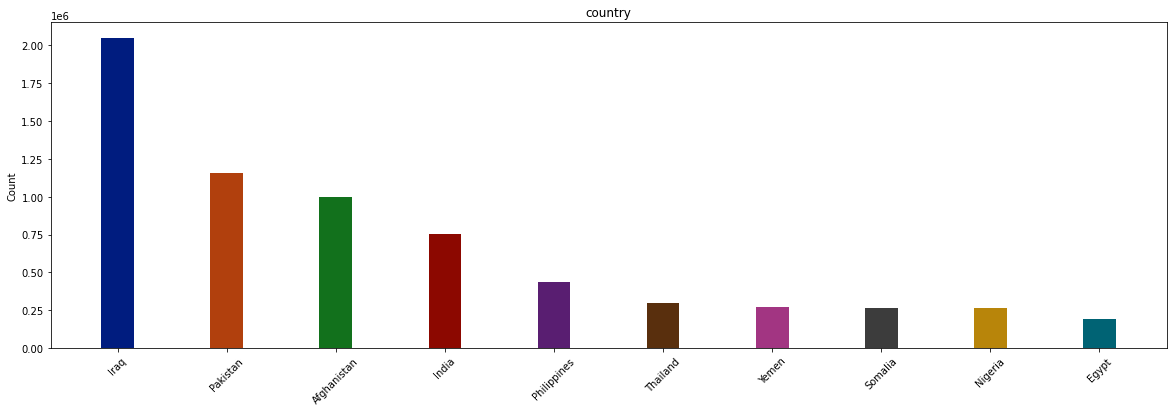

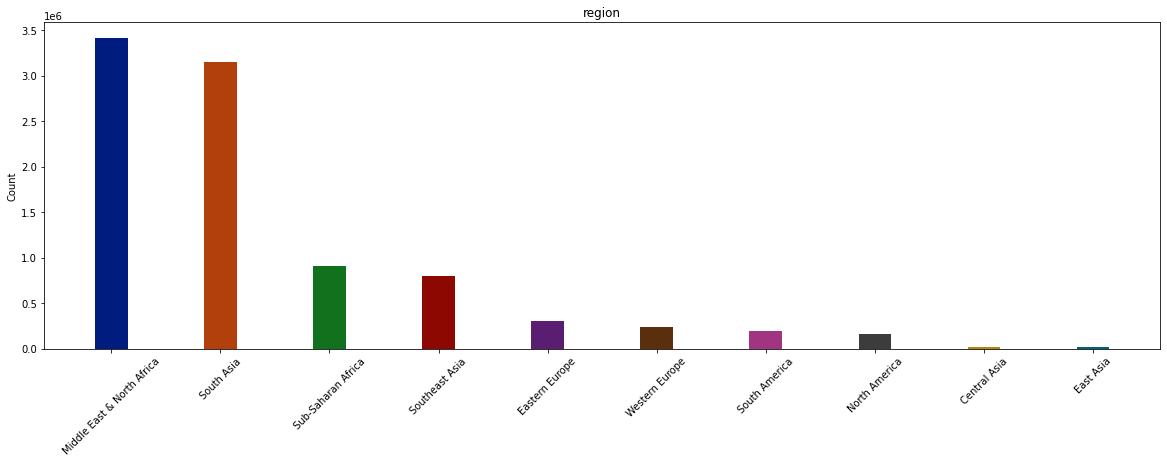

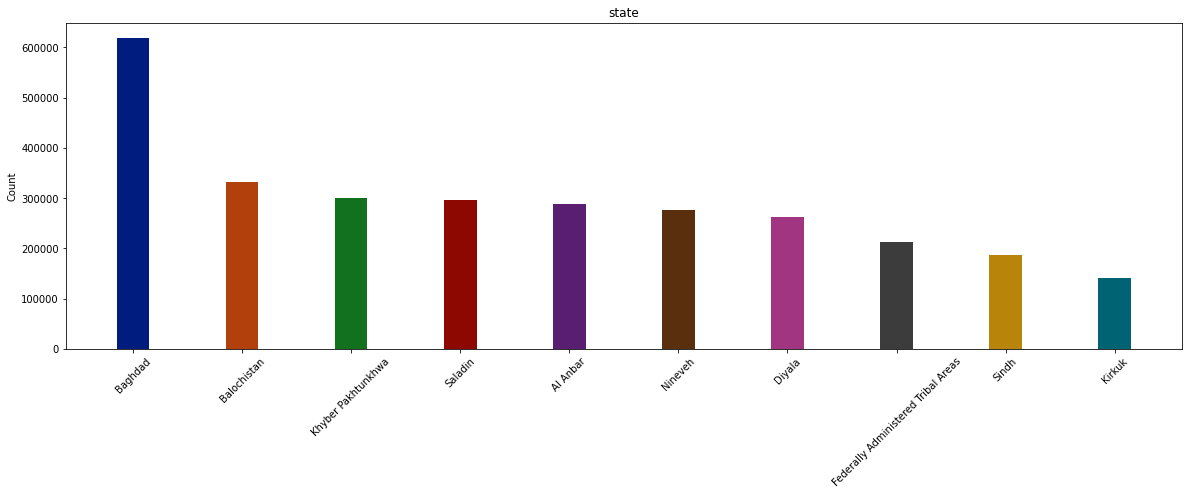

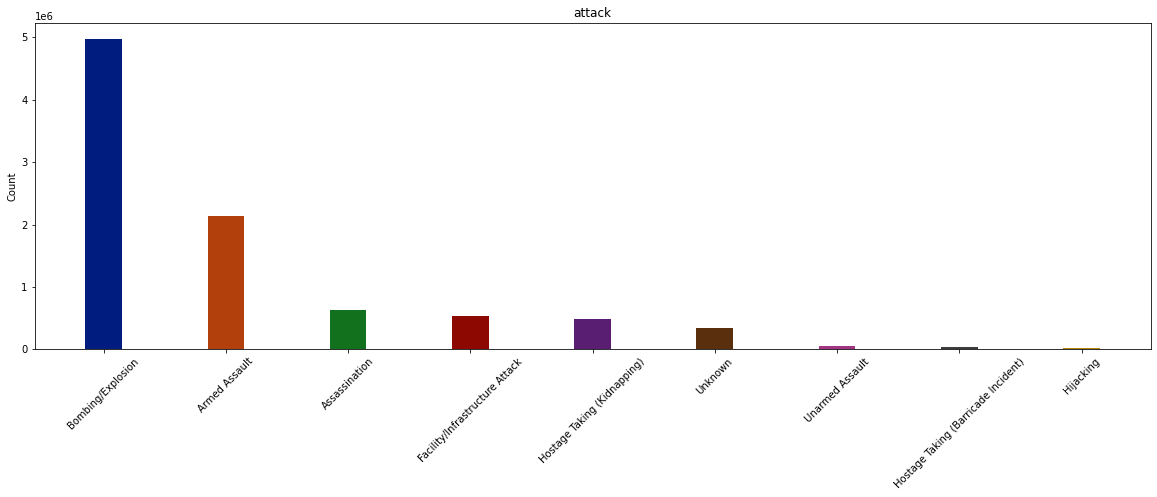

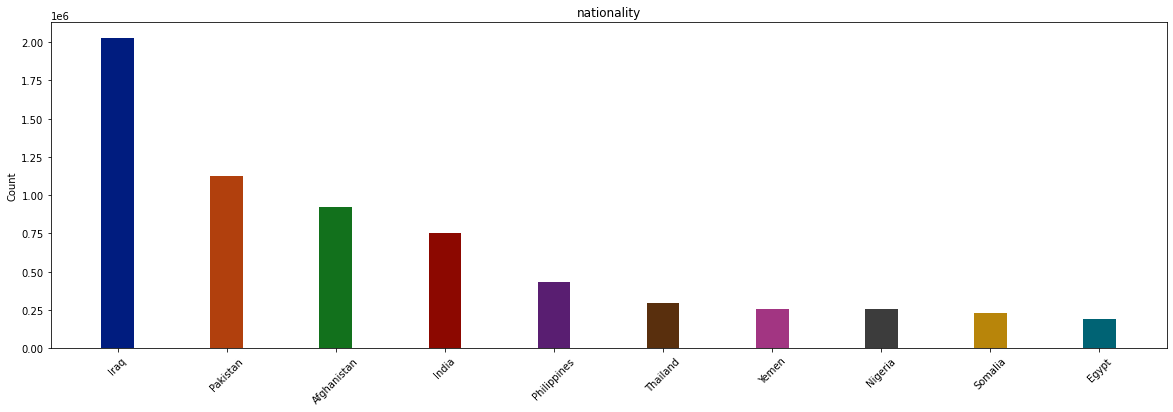

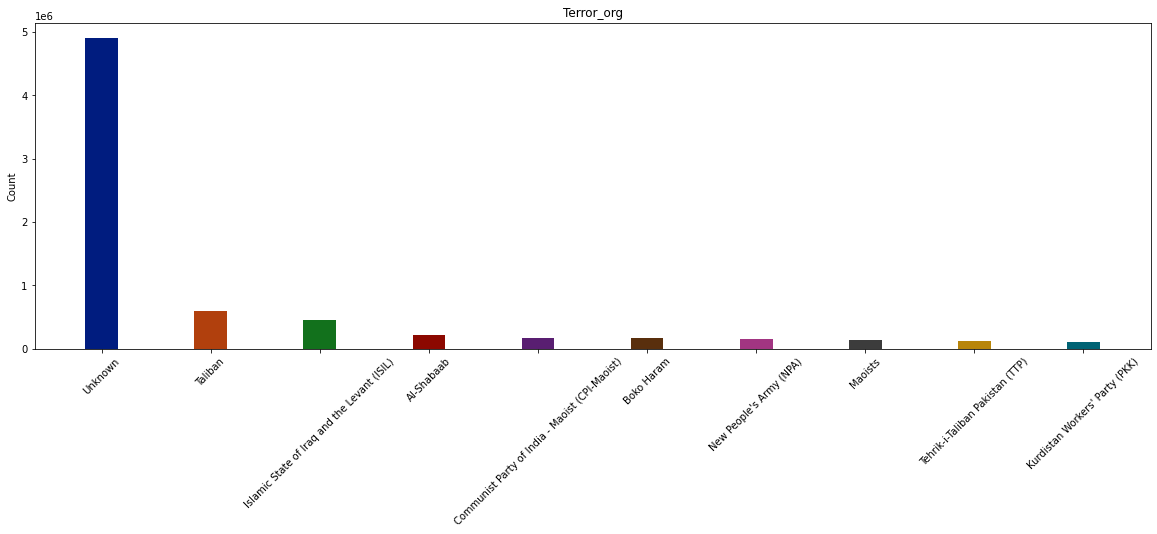

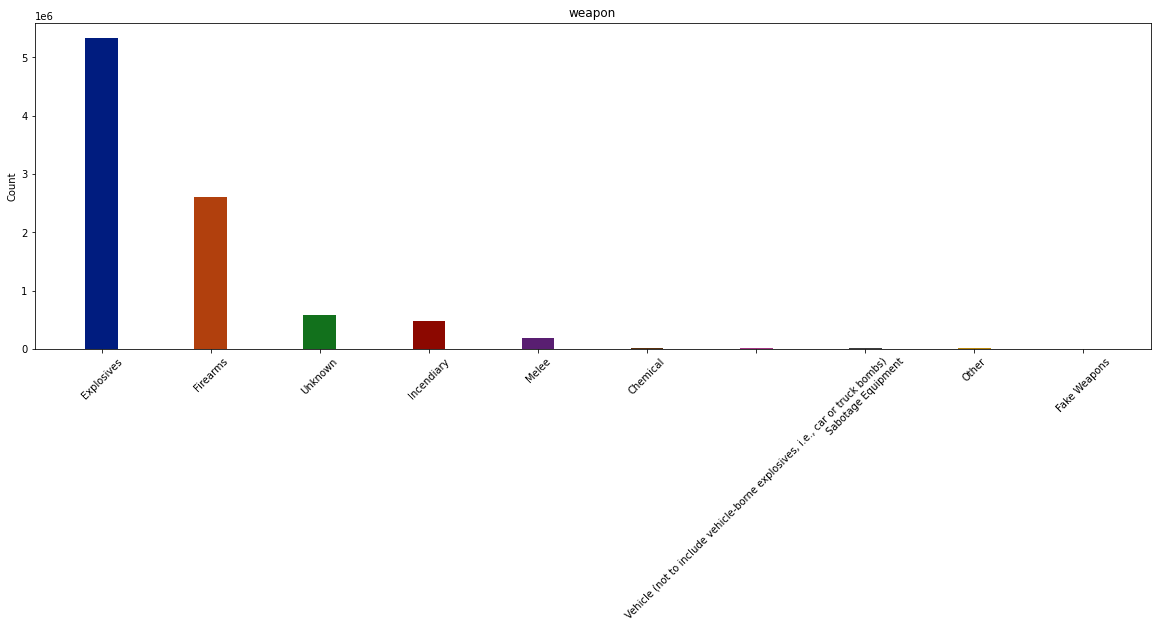

In [45]:
for i in cat_cols:
  r = dict((df[i].value_counts(normalize = False)*100)[:10])
  plt.figure(figsize = (20,6))
  palette_color = sns.color_palette('dark')
  plt.bar(r.keys(),r.values(), color = palette_color, width =0.3)
  plt.title(i)
  plt.ylabel('Count')
  plt.xticks(rotation = 45)
  plt.show()
  

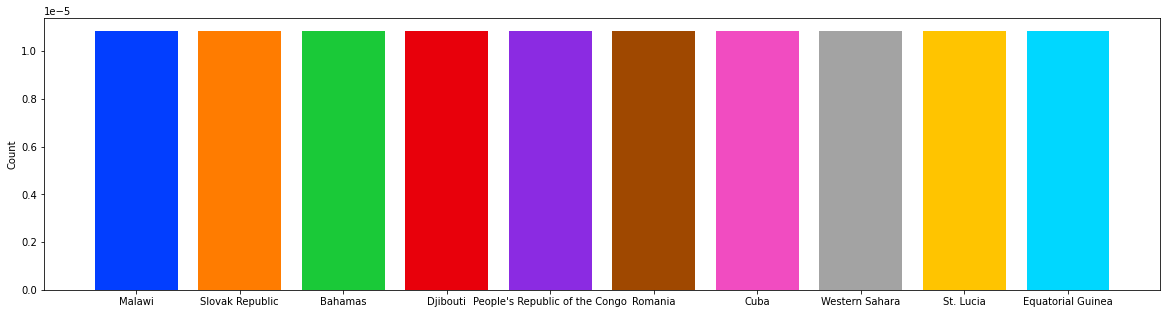

In [46]:
n = dict(df['country'].value_counts(normalize = True).sort_values()[:10])
plt.figure(figsize = (20,5))
plt.bar(n.keys(),n.values(),color = sns.color_palette('bright'))
plt.ylabel('Count')
plt.show()

### From the above Visual information, we observe:
- Countries in the region of Middle East, North Africa and South Asia are the most affected or prone to the attacks.
- Taliban is the known terror group that have caused severe threats across the globe and the major harm is caused by the Bombing and Explosion followed by Armed assault and Assasination.
- Iraq is the worst affected among all nations, whereas there are few nations which are least affected by terror attacks.

In [47]:
df[num_cols].describe()

,extended,crit1,crit2,crit3,doubtterr,multiple,success,suicide,individual,nperps,nperpcap,claimed,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,ishostkid
count,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000
mean,0.038338,0.988172,0.995475,0.877595,0.152844,0.151997,0.860797,0.058880,0.004666,-77.534394,-1.463197,0.143772,1.912417,0.010233,0.353195,3.203694,0.016353,0.119019,0.047150
std,0.192013,0.108113,0.067117,0.327755,0.359839,0.359020,0.346160,0.235402,0.068150,50.417632,12.467738,0.568608,6.902768,0.272828,2.234801,12.846896,0.710508,1.485200,0.431904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-99.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-99.000000,0.000000,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3200.000000,200.000000,1.000000,670.000000,44.000000,151.000000,1500.000000,151.000000,150.000000,1.000000


In [48]:
df.loc[200:209,num_cols]

,extended,crit1,crit2,crit3,doubtterr,multiple,success,suicide,individual,nperps,nperpcap,claimed,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,ishostkid
200,0,1,1,1,1.0,1.0,1,0,0,-99.0,-99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,0,1,1,1,1.0,1.0,1,0,0,-99.0,-99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,0,1,1,1,0.0,0.0,1,0,0,-99.0,-99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203,0,1,1,1,0.0,0.0,1,0,0,-99.0,2.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0
204,0,1,1,1,0.0,1.0,1,0,0,-99.0,-99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205,0,1,1,1,0.0,1.0,1,0,0,-99.0,-99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206,0,1,1,1,0.0,1.0,1,0,0,-99.0,-99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
207,0,1,1,1,0.0,1.0,1,0,0,-99.0,-99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208,0,1,1,1,0.0,0.0,0,0,0,-99.0,-99.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0
209,0,1,1,1,0.0,0.0,1,0,0,-99.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0


**We have some columns which are of integer datatype but records only binary information, hence we club them to other list.**

In [49]:
bin_cols =list(num_cols[:9])
bin_cols.append(num_cols[-1])
bin_cols

['extended',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'multiple',
 'success',
 'suicide',
 'individual',
 'ishostkid']

### Analysing columns with Binary data

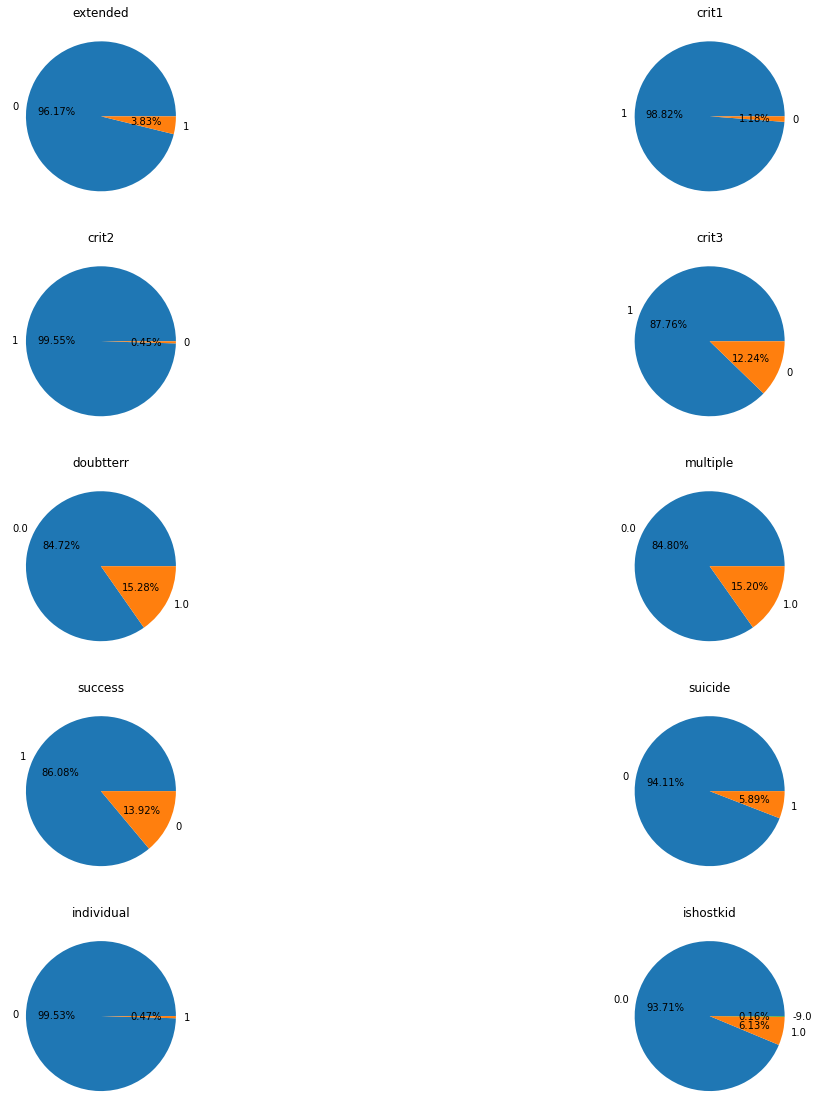

In [50]:
plt.figure(figsize = (20,20))
for i in range(len(bin_cols)):
  plt.subplot(5,2,i+1)
  plt.pie((df[bin_cols[i]].value_counts(normalize = True)*100),autopct = '%1.2f%%',labels = df[bin_cols[i]].unique())
  plt.title(bin_cols[i])
plt.show()

**P.S. the here 1 denote a YES and 0 say it is a NO**

### The Visual information from the above data suggests:
- Major attacks has been successful and have been carried out in a group.
- Only small percentage of the attacks were caused by suicide and also kidnappping the hostages was never a idea behind the attack for maximum times.
- The attacks happened were restricted to just a day for major portion.

In [51]:
num_cols = [item for item in num_cols if item not in bin_cols]
num_cols

['nperps',
 'nperpcap',
 'claimed',
 'nkill',
 'nkillus',
 'nkillter',
 'nwound',
 'nwoundus',
 'nwoundte']

In [52]:
df[num_cols].describe()

,nperps,nperpcap,claimed,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte
count,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000,92153.000000
mean,-77.534394,-1.463197,0.143772,1.912417,0.010233,0.353195,3.203694,0.016353,0.119019
std,50.417632,12.467738,0.568608,6.902768,0.272828,2.234801,12.846896,0.710508,1.485200
min,-99.000000,-99.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-99.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-99.000000,0.000000,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000
max,3200.000000,200.000000,1.000000,670.000000,44.000000,151.000000,1500.000000,151.000000,150.000000


**Analysing columns with numerical data type**

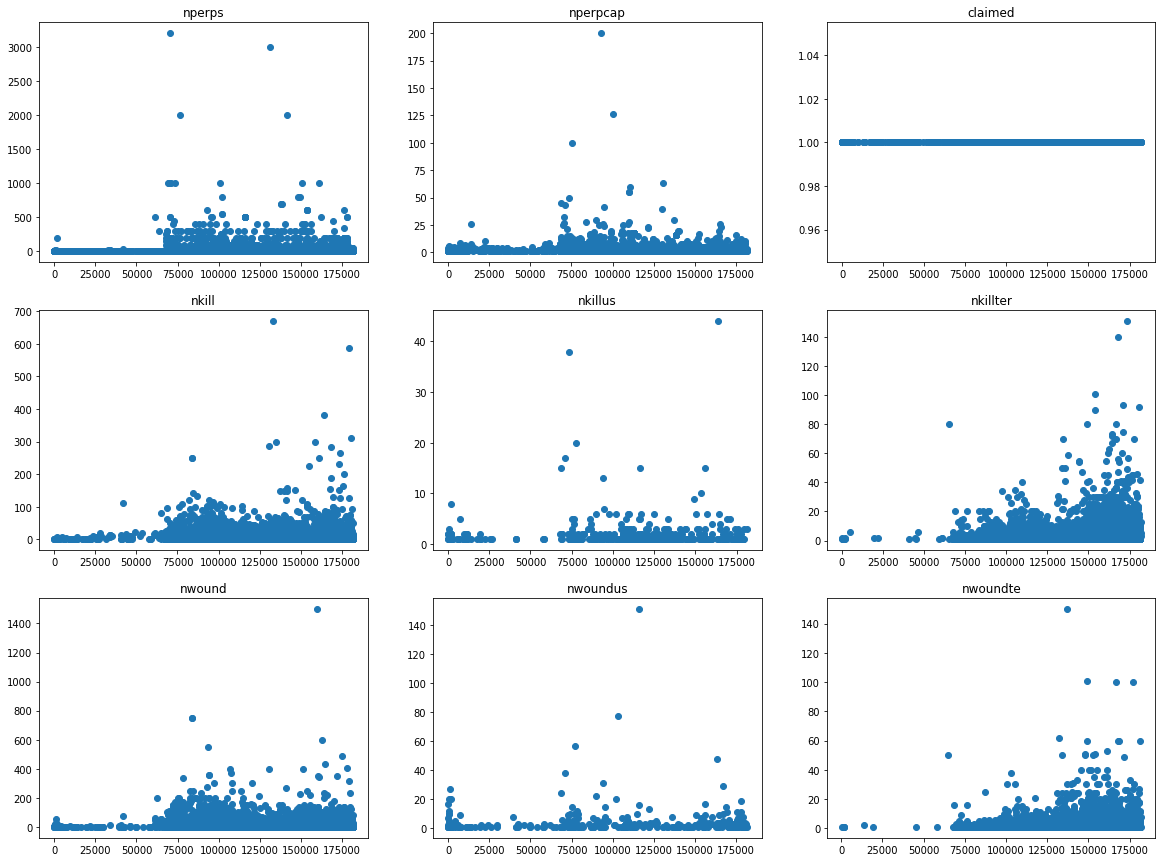

In [53]:
plt.figure(figsize = (20,15))
for i in range(len(num_cols)):
  plt.subplot(3,3,i+1)
  plt.scatter(df[df[num_cols[i]] >0][num_cols[i]].index,df[df[num_cols[i]] >0][num_cols[i]])
  plt.title(num_cols[i])
plt.show()

- Number of kills and wounded are comparatively less when considering attacks aross the globe.
- Casualties among terrorist increases the time proceeds.

### Bivariate Analysis

**Timeline of attacks and its success rate.**

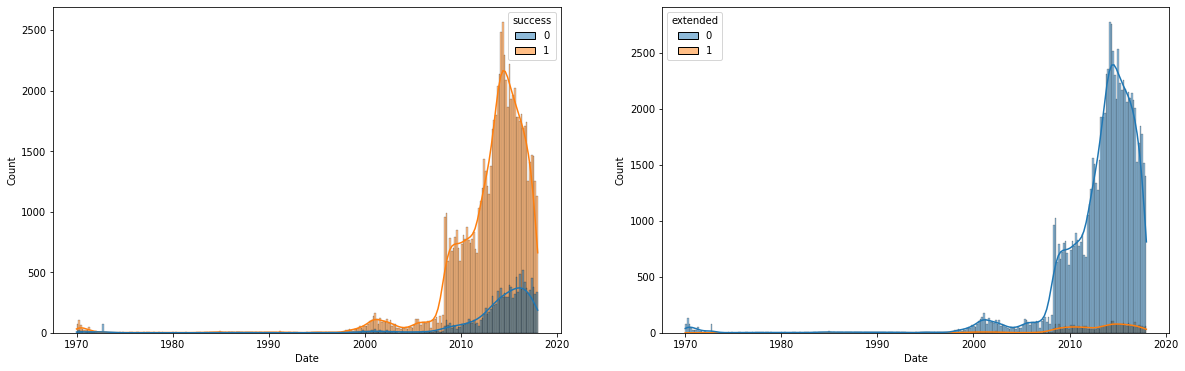

In [54]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
sns.histplot(data = df,x = df['Date'],hue = 'success',kde = True)
plt.subplot(1,2,2)
sns.histplot(data = df,x = df['Date'],hue = 'extended',kde = True)
plt.show()

### When we observe the terror attack happened date wise, we can see from those attacks how many were successful and which attacks were extended for more than a day.

In [55]:
df.head()

,Date,extended,country,region,state,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attack,nationality,Terror_org,individual,nperps,nperpcap,claimed,weapon,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,ishostkid
5,1970-01-01,0,United States,North America,Illinois,1,1,1,0.0,0.0,1,0,Armed Assault,United States,Black Nationalists,0,-99.0,-99.0,0.0,Firearms,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1970-01-02,0,United States,North America,California,1,1,1,1.0,0.0,1,0,Bombing/Explosion,United States,Unknown,0,-99.0,-99.0,0.0,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1970-01-02,0,United States,North America,Wisconsin,1,1,1,0.0,0.0,1,0,Facility/Infrastructure Attack,United States,New Year's Gang,0,1.0,1.0,1.0,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1970-01-03,0,United States,North America,Wisconsin,1,1,1,0.0,0.0,1,0,Facility/Infrastructure Attack,United States,New Year's Gang,0,1.0,1.0,0.0,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,1970-01-06,0,United States,North America,Colorado,1,1,1,1.0,0.0,1,0,Facility/Infrastructure Attack,United States,Left-Wing Militants,0,-99.0,-99.0,0.0,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
df[df['doubtterr']==0].shape, df[df['doubtterr']==1].shape

((78068, 27), (14085, 27))

In [57]:
df.groupby('country')['doubtterr','success'].sum().sort_values(by = 'doubtterr',ascending = False)

<ipython-input-57-5146fb4d2461>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('country')['doubtterr','success'].sum().sort_values(by = 'doubtterr',ascending = False)


,doubtterr,success
country,,
Iraq,2266.0,17924
Afghanistan,1577.0,8931
Pakistan,1394.0,9900
Philippines,1029.0,3612
Yemen,781.0,2269
...,...,...
Ghana,0.0,0
Gambia,0.0,1
Bhutan,0.0,2


**Region wise terrorist attacks, will let us know which region is worst affected and what are the stats for that region.**

In [58]:
reg = df.groupby('region')['nkill','nkillus','nkillter'].mean().sort_values(by = ['nkill','nkillus'],ascending = False).reset_index()
reg

<ipython-input-58-51cd300e8dfa>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  reg = df.groupby('region')['nkill','nkillus','nkillter'].mean().sort_values(by = ['nkill','nkillus'],ascending = False).reset_index()


,region,nkill,nkillus,nkillter
0,Sub-Saharan Africa,3.045374,0.001546,0.493818
1,East Asia,2.845161,0.006452,0.896774
2,Middle East & North Africa,2.328022,0.004247,0.349959
3,South Asia,1.794039,0.012950,0.460008
4,Eastern Europe,1.065154,0.000972,0.199352
5,Central Asia,1.005495,0.000000,0.269231
6,South America,0.901001,0.002633,0.032649
7,Central America & Caribbean,0.734375,0.000000,0.000000
8,Southeast Asia,0.700336,0.000249,0.078216
9,Western Europe,0.335779,0.005179,0.030643


<Figure size 720x432 with 0 Axes>

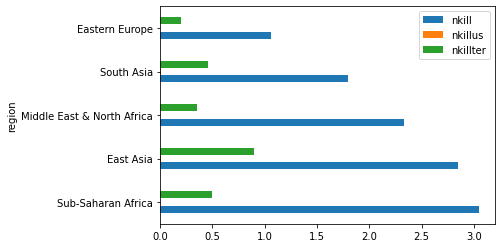

In [59]:
plt.figure(figsize = (10,6))
reg.loc[:4].plot(x = 'region',y = ['nkill','nkillus','nkillter'],kind = 'barh')
plt.show()

**Terrorist organisations and their stats**

In [60]:
ter = df.groupby(['Terror_org'])['nkill','nkillus'].sum().sort_values(by = ['nkill'],ascending = False).reset_index()
ter.head()

<ipython-input-60-b5535230109c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ter = df.groupby(['Terror_org'])['nkill','nkillus'].sum().sort_values(by = ['nkill'],ascending = False).reset_index()


,Terror_org,nkill,nkillus
0,Unknown,55105.0,270.0
1,Islamic State of Iraq and the Levant (ISIL),25747.0,18.0
2,Taliban,22854.0,193.0
3,Boko Haram,8856.0,0.0
4,Al-Shabaab,5967.0,7.0


<Figure size 720x432 with 0 Axes>

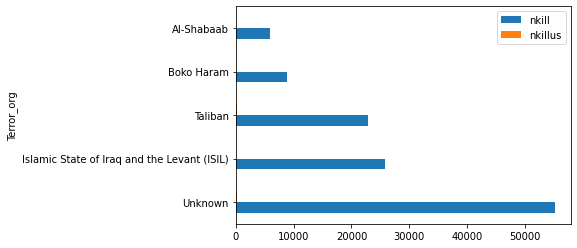

In [61]:
plt.figure(figsize = (10,6))
ter.loc[:4].plot(x = 'Terror_org',y = ['nkill','nkillus'],kind = 'barh')
plt.show()

**Terrorist Organisation and their stats.**

In [62]:
ter1 = df.groupby(['Terror_org'])['nperpcap','nkillter'].sum().reset_index()
ter1 = ter1[(ter1['nkillter']>0) &(ter1['nperpcap']>0)]
ter1.sort_values(by = ['nkillter','nperpcap'],ascending = False,inplace = True,ignore_index = True)
ter1.head()

<ipython-input-62-ef071525fc30>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ter1 = df.groupby(['Terror_org'])['nperpcap','nkillter'].sum().reset_index()


,Terror_org,nperpcap,nkillter
0,Boko Haram,217.0,1753.0
1,Houthi extremists (Ansar Allah),12.0,537.0
2,Sinai Province of the Islamic State,8.0,323.0
3,Sudan People's Liberation Movement in Oppositi...,2.0,275.0
4,Donetsk People's Republic,71.0,273.0


<Figure size 720x432 with 0 Axes>

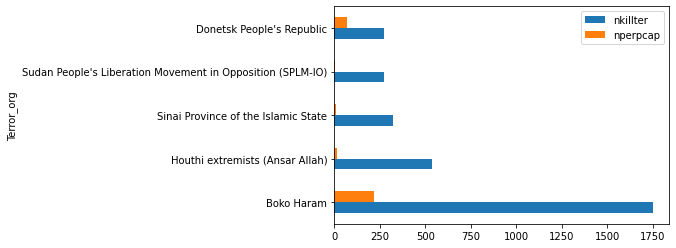

In [63]:
plt.figure(figsize = (10,6))
ter1.loc[:4].plot(x = 'Terror_org',y = ['nkillter','nperpcap'],kind = 'barh')
plt.show()

**Nation wise stats**

In [64]:
nat = df.groupby(['country'])['nkill','nkillter'].sum().sort_values(by = 'nkill',ascending = False).reset_index()
nat.head()

<ipython-input-64-856398611196>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nat = df.groupby(['country'])['nkill','nkillter'].sum().sort_values(by = 'nkill',ascending = False).reset_index()


,country,nkill,nkillter
0,Iraq,53977.0,8300.0
1,Afghanistan,30538.0,11331.0
2,Pakistan,17371.0,2111.0
3,Nigeria,9597.0,1307.0
4,Syria,6654.0,524.0


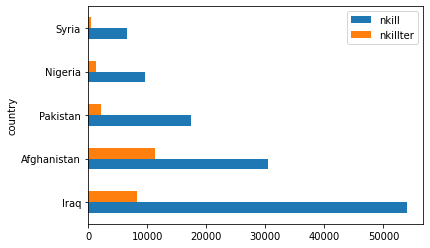

In [65]:
nat.loc[:4].plot(x = 'country',y = ['nkill','nkillter'], kind = 'barh')
plt.show()

In [66]:
df.head(3)

,Date,extended,country,region,state,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attack,nationality,Terror_org,individual,nperps,nperpcap,claimed,weapon,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,ishostkid
5,1970-01-01,0,United States,North America,Illinois,1,1,1,0.0,0.0,1,0,Armed Assault,United States,Black Nationalists,0,-99.0,-99.0,0.0,Firearms,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1970-01-02,0,United States,North America,California,1,1,1,1.0,0.0,1,0,Bombing/Explosion,United States,Unknown,0,-99.0,-99.0,0.0,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1970-01-02,0,United States,North America,Wisconsin,1,1,1,0.0,0.0,1,0,Facility/Infrastructure Attack,United States,New Year's Gang,0,1.0,1.0,1.0,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Terrorist organisation and their stats in India**

In [67]:
ter_IN = df[df['country'] == 'India'].groupby('Terror_org')['nkill','nkillter'].sum().sort_values('nkill',ascending = False).reset_index()
ter_IN.head()

<ipython-input-67-75cbf92e100b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ter_IN = df[df['country'] == 'India'].groupby('Terror_org')['nkill','nkillter'].sum().sort_values('nkill',ascending = False).reset_index()


,Terror_org,nkill,nkillter
0,Communist Party of India - Maoist (CPI-Maoist),2087.0,238.0
1,Unknown,776.0,83.0
2,Maoists,735.0,81.0
3,Lashkar-e-Taiba (LeT),469.0,93.0
4,United Liberation Front of Assam (ULFA),240.0,18.0


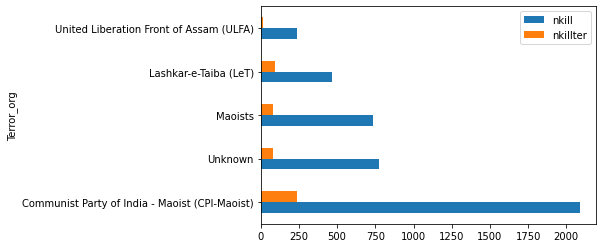

In [68]:
ter_IN.loc[:4].plot(x = 'Terror_org',y = ['nkill','nkillter'],kind = 'barh')
plt.show()

**Terrorist captured vs Hostages kidnapped**

In [69]:
kid = df[df['nperpcap']>0].groupby(['country'])['nperpcap','ishostkid'].sum().sort_values(by = ['nperpcap','ishostkid'],ascending = False).reset_index()
kid.head()

<ipython-input-69-5311a9def783>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  kid = df[df['nperpcap']>0].groupby(['country'])['nperpcap','ishostkid'].sum().sort_values(by = ['nperpcap','ishostkid'],ascending = False).reset_index()


,country,nperpcap,ishostkid
0,Pakistan,1346.0,2.0
1,India,1231.0,38.0
2,United States,878.0,20.0
3,Afghanistan,637.0,9.0
4,Iraq,628.0,3.0


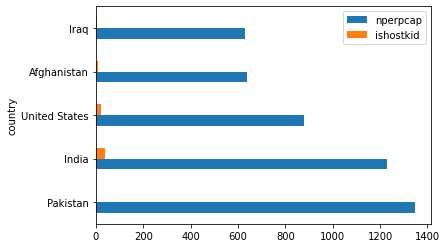

In [70]:
kid.loc[:4].plot(x = 'country',y = ['nperpcap','ishostkid'],kind = 'barh')
plt.show()

**Attack type and the impact of that attack**

In [71]:
AT = df.groupby('attack')['suicide','nkill'].sum().sort_values('suicide',ascending = False).reset_index()
AT.head()

<ipython-input-71-be8cbba13335>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  AT = df.groupby('attack')['suicide','nkill'].sum().sort_values('suicide',ascending = False).reset_index()


,attack,suicide,nkill
0,Bombing/Explosion,5081,93954.0
1,Assassination,235,7371.0
2,Hostage Taking (Barricade Incident),49,2061.0
3,Armed Assault,41,48313.0
4,Hostage Taking (Kidnapping),10,10390.0


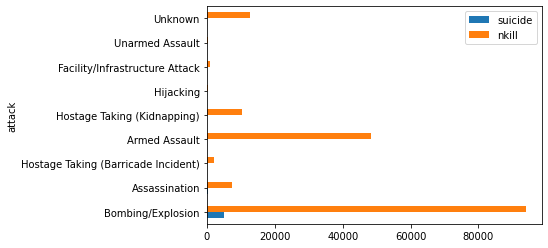

In [72]:
AT.plot(x = 'attack',y = ['suicide','nkill'],kind = 'barh')
plt.show()

**Criteria of the attack Country wise**

In [73]:
CR = df.groupby('country')['crit1','crit2','crit3'].sum().sort_values(['crit1','crit2','crit3'],ascending = False).reset_index()
CR.head()

<ipython-input-73-868e20443ef3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  CR = df.groupby('country')['crit1','crit2','crit3'].sum().sort_values(['crit1','crit2','crit3'],ascending = False).reset_index()


,country,crit1,crit2,crit3
0,Iraq,20414,20454,18328
1,Pakistan,11369,11486,10421
2,Afghanistan,9967,9981,8533
3,India,7385,7440,7145
4,Philippines,4226,4358,3539


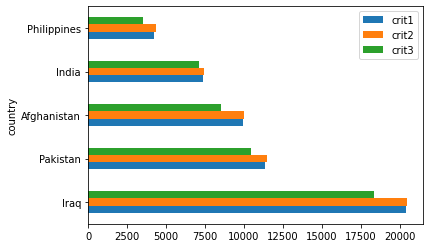

In [74]:
CR.loc[:4].plot(x = 'country',y = ['crit1','crit2','crit3'],kind = 'barh')
plt.show()

In [75]:
df.head()

,Date,extended,country,region,state,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attack,nationality,Terror_org,individual,nperps,nperpcap,claimed,weapon,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,ishostkid
5,1970-01-01,0,United States,North America,Illinois,1,1,1,0.0,0.0,1,0,Armed Assault,United States,Black Nationalists,0,-99.0,-99.0,0.0,Firearms,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1970-01-02,0,United States,North America,California,1,1,1,1.0,0.0,1,0,Bombing/Explosion,United States,Unknown,0,-99.0,-99.0,0.0,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1970-01-02,0,United States,North America,Wisconsin,1,1,1,0.0,0.0,1,0,Facility/Infrastructure Attack,United States,New Year's Gang,0,1.0,1.0,1.0,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1970-01-03,0,United States,North America,Wisconsin,1,1,1,0.0,0.0,1,0,Facility/Infrastructure Attack,United States,New Year's Gang,0,1.0,1.0,0.0,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,1970-01-06,0,United States,North America,Colorado,1,1,1,1.0,0.0,1,0,Facility/Infrastructure Attack,United States,Left-Wing Militants,0,-99.0,-99.0,0.0,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
df.groupby('weapon')['nkill'].sum().sort_values(ascending = False)

weapon
Explosives                                                                     103548.0
Firearms                                                                        51713.0
Unknown                                                                         16139.0
Melee                                                                            3013.0
Incendiary                                                                       1357.0
Chemical                                                                          167.0
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       155.0
Other                                                                             100.0
Sabotage Equipment                                                                 40.0
Radiological                                                                        2.0
Fake Weapons                                                                        1.0
Biological               

In [77]:
df[df['weapon'] == 'Radiological'].groupby(['country','Terror_org'])['nkill'].sum()

country      Terror_org
Afghanistan  Taliban       2.0
Japan        Unknown       0.0
Name: nkill, dtype: float64

In [78]:
df.groupby(['ishostkid','suicide'])['crit1','crit2','crit3'].sum()

<ipython-input-78-1a91d8b12994>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['ishostkid','suicide'])['crit1','crit2','crit3'].sum()


crit1  crit2  crit3
ishostkid suicide                     
-9.0      0          137    139    120
          1            4      4      3
 0.0      0        80068  80655  70846
          1         5351   5332   4486
 1.0      0         5438   5540   5355
          1           65     66     63

In [79]:
COR = df[['success','suicide','crit1','crit2','crit3','nkill','nkillter','ishostkid']].corr()
COR

,success,suicide,crit1,crit2,crit3,nkill,nkillter,ishostkid
success,1.000000,-0.019401,-0.016160,-0.013100,0.002371,0.067493,-0.050726,0.048764
suicide,-0.019401,1.000000,0.024807,0.000380,-0.029512,0.244358,0.168126,-0.023997
crit1,-0.016160,0.024807,1.000000,-0.007376,-0.040860,0.010986,0.011991,-0.013852
crit2,-0.013100,0.000380,-0.007376,1.000000,-0.025180,-0.009405,-0.006201,-0.002373
crit3,0.002371,-0.029512,-0.040860,-0.025180,1.000000,-0.026697,-0.112669,0.038164
nkill,0.067493,0.244358,0.010986,-0.009405,-0.026697,1.000000,0.368991,-0.001964
nkillter,-0.050726,0.168126,0.011991,-0.006201,-0.112669,0.368991,1.000000,-0.028642
ishostkid,0.048764,-0.023997,-0.013852,-0.002373,0.038164,-0.001964,-0.028642,1.000000


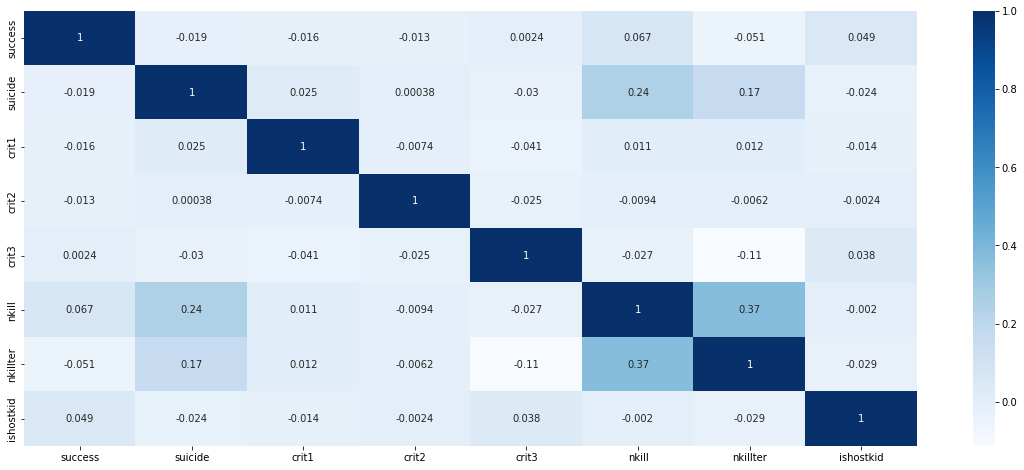

In [80]:
plt.figure(figsize = (20,8))
sns.heatmap(COR,annot = True,cmap = 'Blues')
plt.show()

## Conclusion:
- Success rate of the attack is high but also thencapturing and killing of the Terrorist is on up side as the time proceeds.
- Even the success of the attacks are high the time of the attack is restricted to just a day for maximum times. This is because of the efforts by the nation and its security forces. 
- Countries in the Middle east and South Asia are most affected. The intentions of the attack is to create a threat and sense of danger among the citizen.
- Kidnapping hostages is observed to be low in numbers but have it is considerable high for countries like INDIA.
- Killings by bombing and explosion is highest but the suicide attacks that include explosions have caused lesser causalities than Assassinations.  
- Weapons used for majority of attacks are Fire arms and explosives, use of biological or Radiological is low and only Taliban have been observed to make use of advance weapons and that on Afghanistan.